In [1]:

import numpy as np
import matplotlib.pyplot as plt
from gekko import GEKKO

def get_solver(p, nr_points=501): 
    # create GEKKO model
    m = GEKKO()
    m.time = np.linspace(0,1,nr_points) # scale 0-1 time with tf
    # options
    m.options.NODES = 6
    m.options.SOLVER = 3
    m.options.IMODE = 6
    m.options.MAX_ITER = 500
    m.options.MV_TYPE = 0
    m.options.DIAGLEVEL = 0

    tf = m.FV(value=1.0,lb=0.1,ub=15) # final time
    tf.STATUS = 1
    u = m.MV(value=10,lb=-10,ub=10) # force
    u.STATUS = 1
    u.DCOST = 1e-8
    s = m.Var(value=0,lb=0, ub=100) # variables
    v = m.Var(value=0,lb=-10,ub=4)

    # differential equations scaled by tf
    m.Equation(s.dt()==tf*v)
    m.Equation(v.dt()==tf*(u - p))
    
    m.fix(s, pos=len(m.time)-1,val=10.0) # specify endpoint conditions
    #m.fix(v, pos=len(m.time)-1,val=-0.0)
    m.Obj(tf) # minimize final time
    m.solve() # Optimize launch
    ts = m.time * tf.value[0]

    ##return ts, s.value, v.value, u.value    
    return m, tf, s, v , u    

In [2]:
def plot_p(p, m, tf, s, v , u):    
    ts = m.time * tf.value[0] # scaled time

    # plot results
    plt.figure(1)
    plt.subplot(3,1,1)
    plt.plot(ts,s.value,'r-',lw=2)
    plt.ylabel('Position')
    plt.legend(['x_1 (Position)'])

    plt.subplot(3,1,2)
    plt.plot(ts,v.value,'b-',lw=2)
    plt.ylabel('Velocity')
    plt.legend(['x_2 (Velocity)'])

    plt.subplot(3,1,3)
    plt.plot(ts,u.value,'g-',lw=2)
    plt.ylabel('Force')
    plt.legend(['u (Force)'])

    plt.xlabel('Time')
    plt.title(f"The numerical solution (T= {tf.value[0]}) with p = {p}",y=-0.8)
    plt.show()

apm 220.255.49.39_gk_model0 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            2
   Equations    :            3
   Residuals    :            3
 
 Number of state variables:          14499
 Number of total equations: -        14000
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            499
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

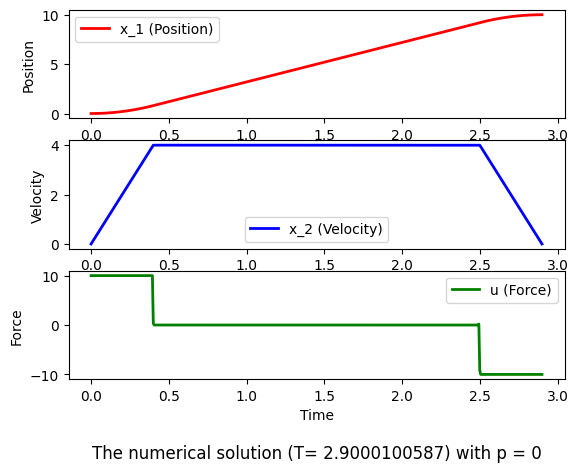

In [3]:
p = 0
m, tf, s, v , u  = get_solver(p)
plot_p(p, m, tf, s, v , u)


apm 220.255.49.39_gk_model1 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            2
   Equations    :            3
   Residuals    :            3
 
 Number of state variables:          14499
 Number of total equations: -        14000
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            499
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

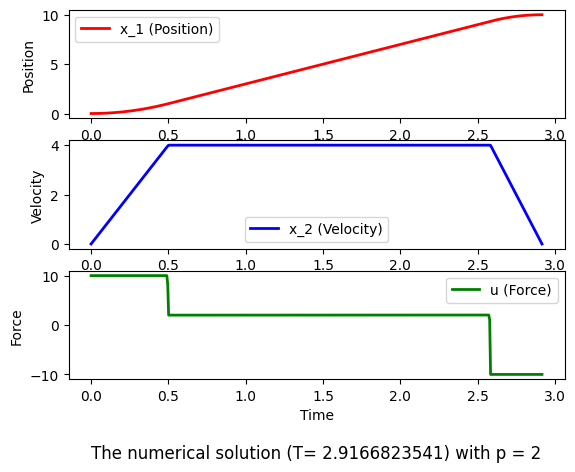

In [4]:
p = 2
m, tf, s, v , u  = get_solver(p)
plot_p(p, m, tf, s, v , u)

apm 220.255.49.39_gk_model2 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            2
   Equations    :            3
   Residuals    :            3
 
 Number of state variables:          14499
 Number of total equations: -        14000
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            499
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

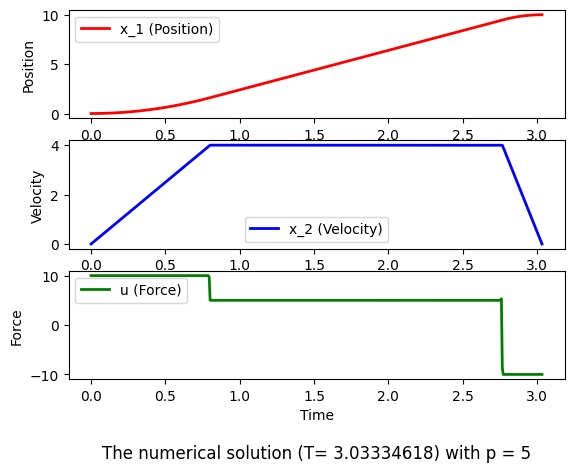

In [5]:
p = 5
m, tf, s, v , u  = get_solver(p)
plot_p(p, m, tf, s, v , u)

apm 220.255.49.39_gk_model3 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            2
   Equations    :            3
   Residuals    :            3
 
 Number of state variables:          14499
 Number of total equations: -        14000
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            499
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

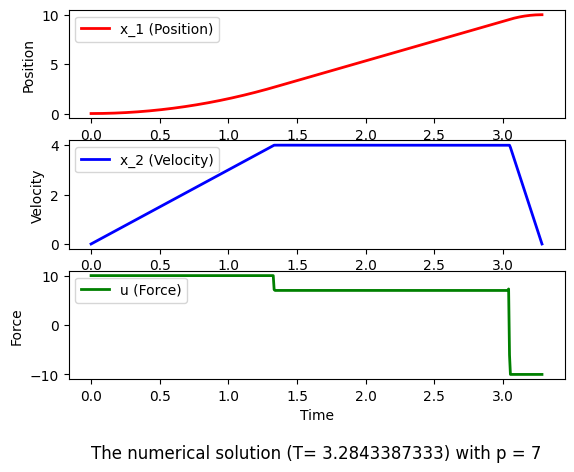

In [6]:
p = 7
m, tf, s, v , u  = get_solver(p)
plot_p(p, m, tf, s, v , u)

apm 220.255.49.39_gk_model4 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            2
   Equations    :            3
   Residuals    :            3
 
 Number of state variables:          14499
 Number of total equations: -        14000
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            499
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

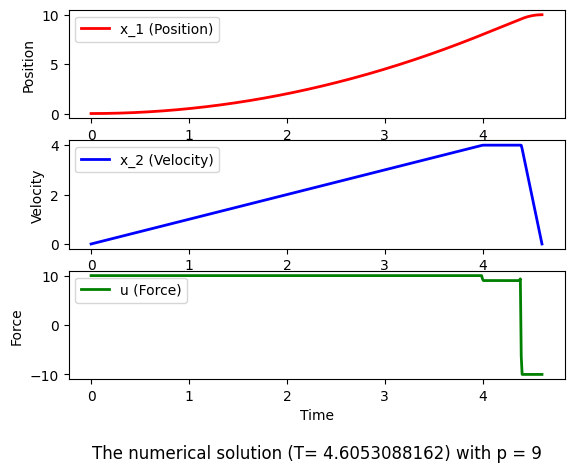

In [7]:
p = 9
m, tf, s, v , u  = get_solver(p)
plot_p(p, m, tf, s, v , u)

In [8]:
# ts = m.time * tf.value[0] # scaled time

# # plot results
# plt.figure(1)
# plt.subplot(3,1,1)
# plt.plot(ts,s.value,'r-',lw=2)
# plt.ylabel('Position')
# plt.legend(['x_1 (Position)'])

# plt.subplot(3,1,2)
# plt.plot(ts,v.value,'b-',lw=2)
# plt.ylabel('Velocity')
# plt.legend(['x_2 (Velocity)'])

# plt.subplot(3,1,3)
# plt.plot(ts,u.value,'g-',lw=2)
# plt.ylabel('Force')
# plt.legend(['u (Force)'])

# plt.xlabel('Time')
# plt.title(f"The numerical solution (T= {tf.value[0]}) with p = {p}",y=-0.8)
# plt.show()

In [9]:
# ## https://apmonitor.com/do/index.php/Main/RocketOptimization

# import numpy as np
# import matplotlib.pyplot as plt
# from gekko import GEKKO

# # create GEKKO model
# m = GEKKO()

# # scale 0-1 time with tf
# m.time = np.linspace(0,1,501)

# # options
# m.options.NODES = 6
# m.options.SOLVER = 3
# m.options.IMODE = 6
# m.options.MAX_ITER = 500
# m.options.MV_TYPE = 0
# m.options.DIAGLEVEL = 0

# # final time
# tf = m.FV(value=1.0,lb=0.1,ub=15)
# tf.STATUS = 1

# # force
# u = m.MV(value=10,lb=-10,ub=10)
# u.STATUS = 1
# u.DCOST = 1e-5

# # variables
# s = m.Var(value=0,lb=0, ub=100)
# v = m.Var(value=0,lb=-10,ub=4)
# ## mass = m.Var(value=1,lb=0.2)

# # differential equations scaled by tf
# m.Equation(s.dt()==tf*v)
# m.Equation(v.dt()==tf*(u))
# # m.Equation(mass.dt()==tf*(-0.01*u**2))

# # specify endpoint conditions
# m.fix(s, pos=len(m.time)-1,val=10.0)
# #m.fix(v, pos=len(m.time)-1,val=-0.0)

# # minimize final time
# m.Obj(tf)

# # Optimize launch
# m.solve()

# print('Optimal Solution (final time): ' + str(tf.value[0]))

# # scaled time
# ts = m.time * tf.value[0]

# # plot results
# plt.figure(1)
# plt.subplot(3,1,1)
# plt.plot(ts,s.value,'r-',lw=2)
# plt.ylabel('Position')
# plt.legend(['x_1 (Position)'])

# plt.subplot(3,1,2)
# plt.plot(ts,v.value,'b-',lw=2)
# plt.ylabel('Velocity')
# plt.legend(['x_2 (Velocity)'])

# # plt.subplot(4,1,3)
# # plt.plot(ts,mass.value,'k-',lw=2)
# # plt.ylabel('Mass')
# # plt.legend(['m (Mass)'])

# plt.subplot(3,1,3)
# plt.plot(ts,u.value,'g-',lw=2)
# plt.ylabel('Force')
# plt.legend(['u (Force)'])

# plt.xlabel('Time')
# plt.show()